# 03 · Trips Data Analysis After Cleaning

## Objective
This notebook performs an in-depth analysis of the CitiBike trip data after the ETL (Extract, Transform, Load) cleaning process. The main goal is to understand user behavior patterns, focusing on:
1. **Trip Duration Distribution:** Analyzing how long typical trips last.
2. **User Segmentation:** Comparing behavior between Annual Members and Casual users.
3. **Bike Usage:** Analyzing differences in usage between Electric and Classic bikes.

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Data loading

Load the same trip data but in this case the cleaned one.

In [12]:
DATA_PATH = "../data/interim/202501-citibike-tripdata_1.parquet"

df = pd.read_parquet(DATA_PATH)
print(f"Dataset Shape: {df.shape}")

Dataset Shape: (866555, 14)


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 866555 entries, 0 to 866554
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   ride_id             866555 non-null  object        
 1   rideable_type       866555 non-null  category      
 2   started_at          866555 non-null  datetime64[ns]
 3   ended_at            866555 non-null  datetime64[ns]
 4   start_station_name  866555 non-null  object        
 5   start_station_id    866555 non-null  float64       
 6   end_station_name    866555 non-null  object        
 7   end_station_id      866555 non-null  float64       
 8   start_lat           866555 non-null  float64       
 9   start_lng           866555 non-null  float64       
 10  end_lat             866555 non-null  float64       
 11  end_lng             866555 non-null  float64       
 12  member_casual       866555 non-null  category      
 13  trip_duration       866555 no

A preliminary inspection reveals that approximately 140,000 records were removed, corresponding to invalid trips or incomplete entries. The dataset is now fully populated with no missing values.

## Exploratory data analysis (Post-Cleaning)

Previous analyses are revisited to determine if the data cleaning process has significantly altered the underlying data distributions.

### Distribution by bike type

First, the following question is addressed: Which vehicles are most used in the fleet?

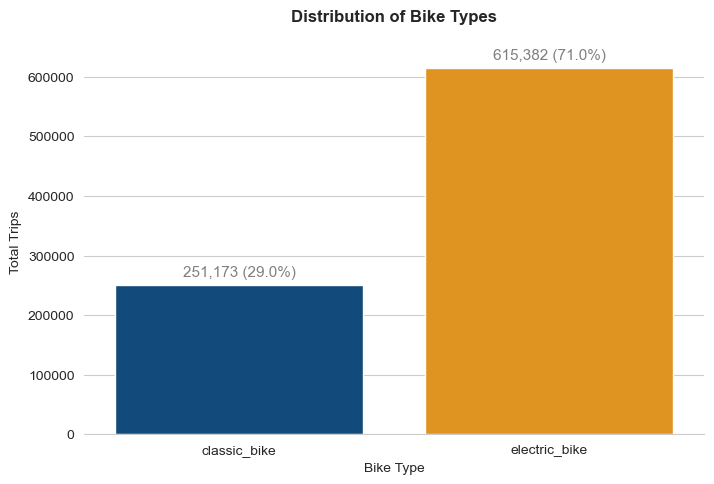

In [14]:
bike_counts = df['rideable_type'].value_counts().reset_index()
bike_counts.columns = ['Type', 'Count']

plt.figure(figsize=(8, 5))
ax = sns.barplot(data=bike_counts, x='Type', y='Count', hue='Type', palette=["#004c8c", "#ff9900"])
plt.title("Distribution of Bike Types", fontweight='bold', pad=20)
plt.xlabel("Bike Type")
plt.ylabel("Total Trips")
sns.despine(left=True)

total = len(df)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    ax.annotate(f'{int(p.get_height()):,} ({percentage})',  
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points',
                fontsize=11, color='grey')

plt.show()

Post-cleaning, the distribution remains largely unchanged. Electric bikes increased slightly from 69.9% to 71%, while classic bikes decreased from 30.1% to 29%.

### Distribution by user menbership

Next, usage patterns between casual users and annual members are compared.

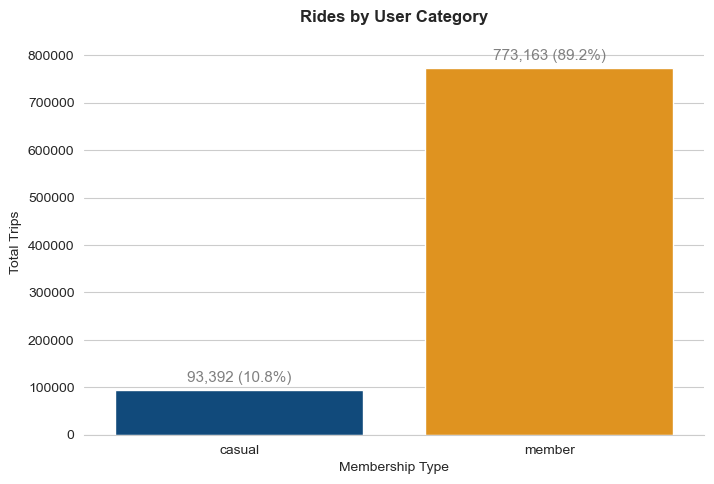

In [15]:
user_counts = df['member_casual'].value_counts().reset_index()
user_counts.columns = ['Membership', 'Count']

plt.figure(figsize=(8, 5))
ax = sns.barplot(data=user_counts, x='Membership', y='Count', hue='Membership', palette=["#004c8c", "#ff9900"])
plt.title("Rides by User Category", fontweight='bold', pad=20)
plt.xlabel("Membership Type")
plt.ylabel("Total Trips")
sns.despine(left=True)

total = len(df)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    ax.annotate(f'{int(p.get_height()):,} ({percentage})', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points',
                fontsize=11, color='grey')

plt.show()

Once again, the distribution displays minimal change. Members shifted from 89.7% to 89.2%, while casual users increased slightly from 10.3% to 10.8%.

### Top 10 start and end stations

Finally, an evaluation is conducted to determine whether any specific station was disproportionately affected by the record removal process.

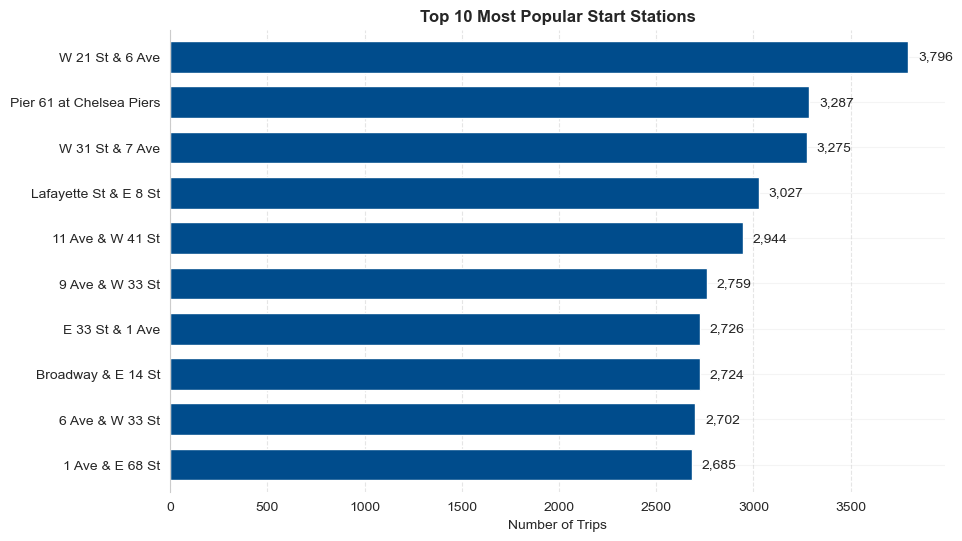

In [16]:
top_start = df['start_station_name'].value_counts().head(10).sort_values(ascending=True)

plt.figure(figsize=(10, 6))
ax = top_start.plot(kind='barh', color='#004c8c', width=0.7)
plt.title("Top 10 Most Popular Start Stations", fontweight='bold')
plt.xlabel("Number of Trips")
plt.ylabel("")
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.grid(axis='y', alpha=0.2) 
sns.despine(bottom=True)

# Add value labels
for index, value in enumerate(top_start):
    plt.text(value + 50, index, str(f"{value:,}"), va='center', fontsize=10)

plt.show()

Overall, the ranking remains consistent, with only minor reordering. 'W 21 St & 6 Ave' remains the most popular station, followed by 'Pier 61 at Chelsea Piers' and 'W 31 St & 7 Ave', which swapped positions following the cleaning process. Noticeably, 'University Pl & E 14 St' was the most impacted, dropping out of the top 10 in the post-cleaning graph.

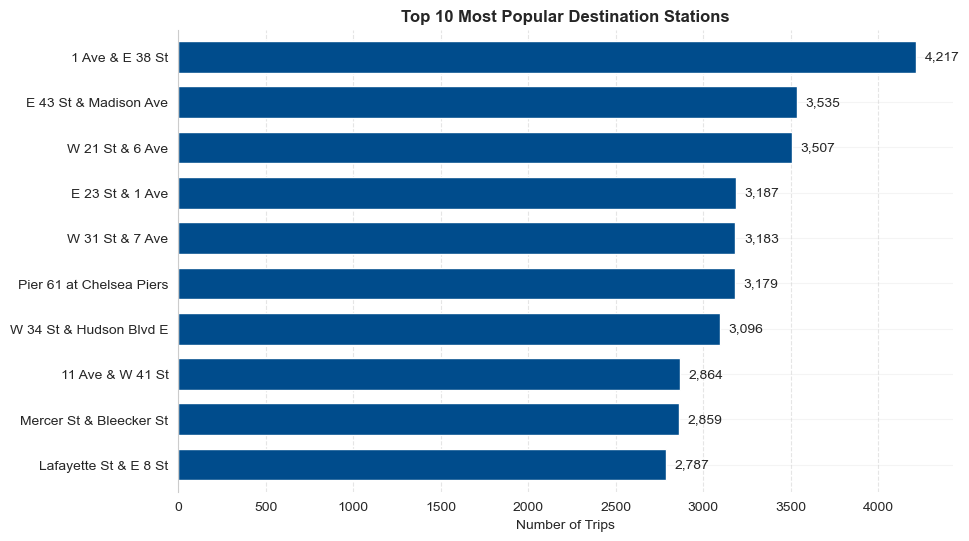

In [17]:
top_end = df['end_station_name'].value_counts().head(10).sort_values(ascending=True)

plt.figure(figsize=(10, 6))
ax = top_end.plot(kind='barh', color='#004c8c', width=0.7)
plt.title("Top 10 Most Popular Destination Stations", fontweight='bold')
plt.xlabel("Number of Trips")
plt.ylabel("")
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.grid(axis='y', alpha=0.2) 
sns.despine(bottom=True)

# Add value labels
for index, value in enumerate(top_end):
    plt.text(value + 50, index, str(f"{value:,}"), va='center', fontsize=10)

plt.show()

A similar trend is observed regarding the most popular destination stations, there are no major changes aside from slight adjustments in rank order.

## Trip duration analysis

The new `trip_duration` column is investigated to visualize trip frequency by time and to estimate the average user trip duration.

In [18]:
print(f'Mean trip duration: {df["trip_duration"].mean()/60:.2f} minutes')
print(f'Median trip duration: {df["trip_duration"].median()/60:.2f} minutes')

Mean trip duration: 10.28 minutes
Median trip duration: 7.83 minutes


Although the mean is slightly over 10 minutes, a median of under 8 minutes indicates the presence of long-duration trips that skew the average upwards.

### Trip duration distribution

The following graph displays the number of trips per minute.

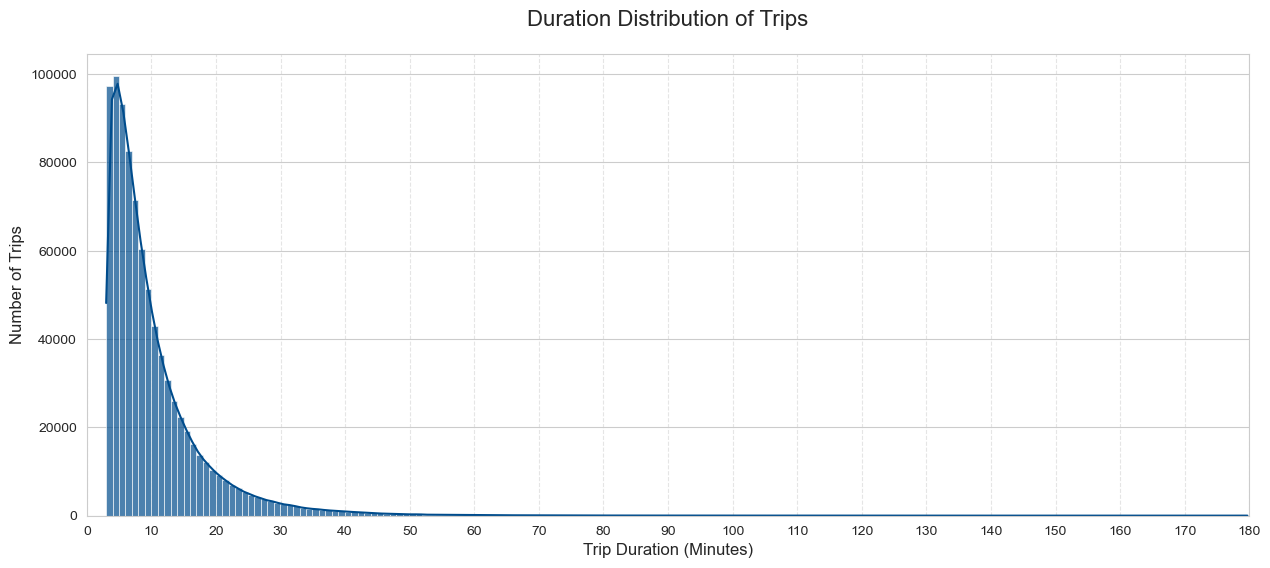

In [19]:
# Create auxiliary column for trip duration in minutes
df['duration_min'] = df['trip_duration'] / 60

plt.figure(figsize=(15, 6))
sns.histplot(data=df, x='duration_min', binwidth=1, kde=True, color='#004c8c', edgecolor='white', alpha=0.7)

# Set ticks every 10 minutes
plt.xticks(np.arange(0, 181, 10)) 
plt.xlim(0, 180)

plt.title('Duration Distribution of Trips', fontsize=16, pad=20)
plt.xlabel('Trip Duration (Minutes)', fontsize=12)
plt.ylabel('Number of Trips', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.5)

plt.show()

Several key insights are revealed by this graph. Firstly, the effectiveness of the filter removing trips under 3 minutes is confirmed. Secondly, the peak frequency occurs at 5 minutes, after which usage declines until trips exceeding one hour become negligible. This distribution explains the metrics shown above: the high volume of 3-6 minute trips pulls the median down, while the sustained tail of trips between 20-40 minutes slightly elevates the mean.

### Duration distribution by user and bike type

Having established the general time distribution, an investigation is conducted into which user types take longer trips and which bikes are used. For this analysis, as observed in previous charts, data normalization is necessary because groups of vastly different sizes are being compared (nearly 90% members and over 70% electric bike usage). Without normalization, the larger group's curve would dwarf the other, hindering visual comparison.

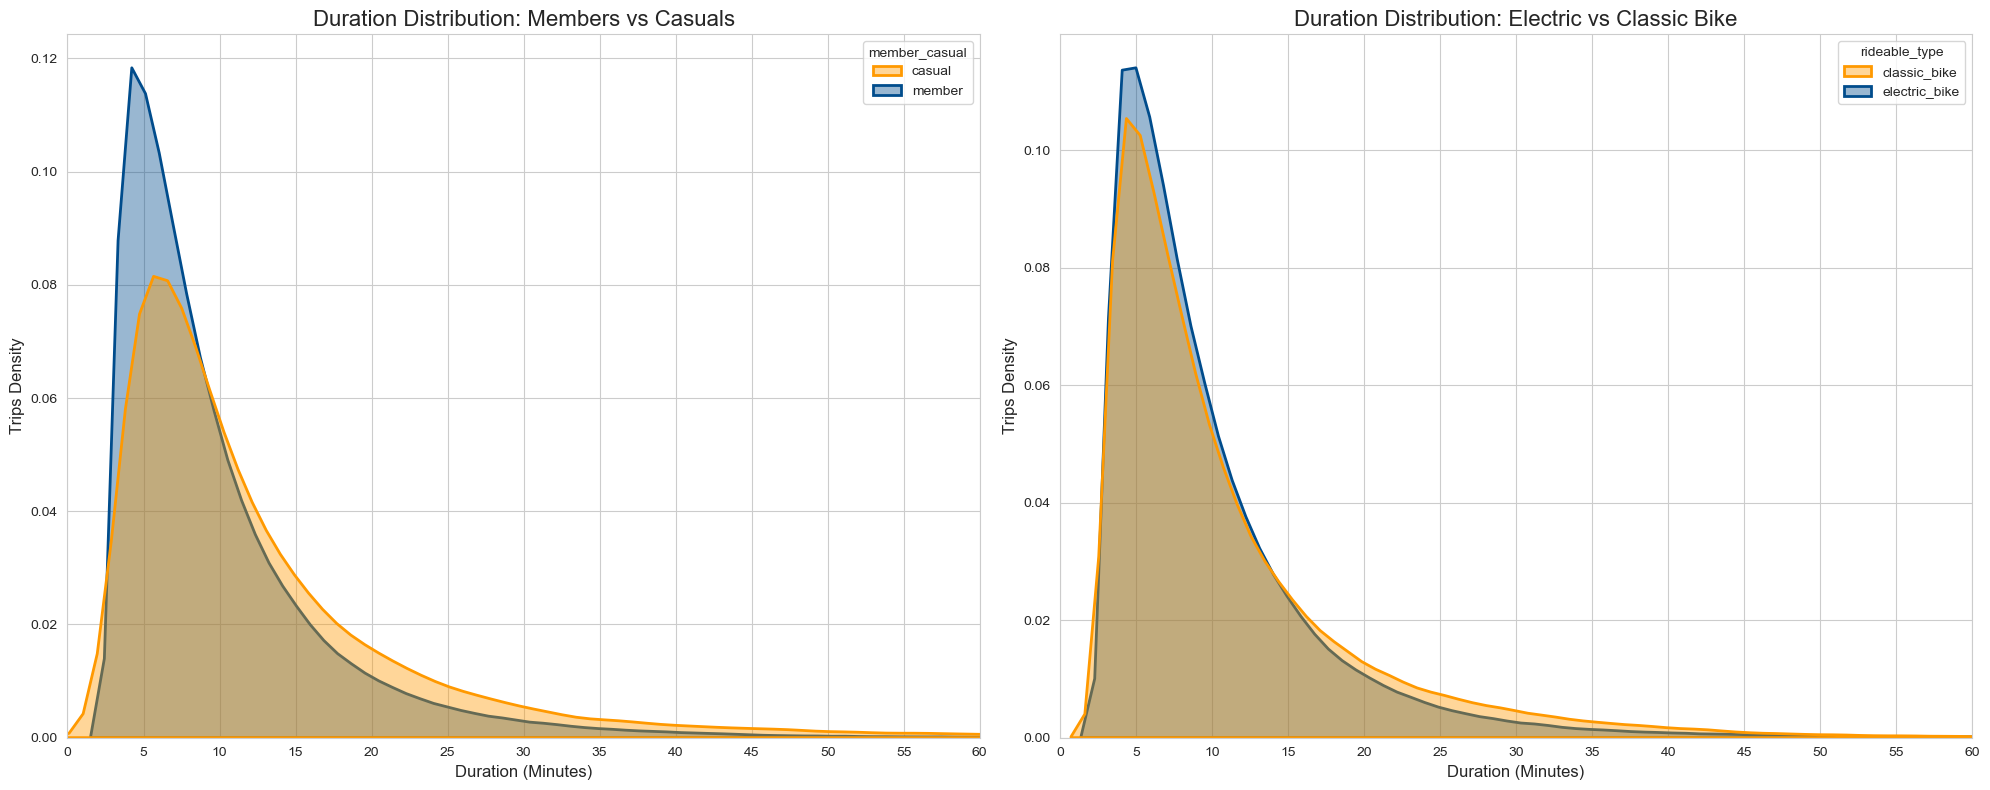

In [20]:
plt.figure(figsize=(20, 8))
sns.set_style("whitegrid")

# Plot 1: Member vs Casual
plt.subplot(1, 2, 1)
sns.kdeplot(
    data=df, 
    x='duration_min', 
    hue='member_casual', 
    fill=True, 
    common_norm=False, 
    palette={'member': '#004c8c', 'casual': '#ff9900'},
    alpha=0.4,
    linewidth=2
)

plt.title('Duration Distribution: Members vs Casuals', fontsize=16)
plt.xlabel('Duration (Minutes)', fontsize=12)
plt.ylabel('Trips Density', fontsize=12)
plt.xlim(0, 60)
plt.xticks(np.arange(0, 61, 5))

# Plot 2: Bike Type
plt.subplot(1, 2, 2)
sns.kdeplot(
    data=df, 
    x='duration_min', 
    hue='rideable_type', 
    fill=True, 
    common_norm=False,
    palette={'electric_bike': '#004c8c', 'classic_bike': '#ff9900'},
    alpha=0.4,
    linewidth=2
)

plt.title('Duration Distribution: Electric vs Classic Bike', fontsize=16)
plt.xlabel('Duration (Minutes)', fontsize=12)
plt.ylabel('Trips Density', fontsize=12)
plt.xlim(0, 60) 
plt.xticks(np.arange(0, 61, 5))

plt.tight_layout()
plt.show()

In the first graph, a clear peak of 4-5 minute trips by members is seen. This is expected, as subscribers do not pay extra for single rides. In contrast, casual users likely avoid paying fees for short distances that can be easily walked. Since members pay a subscription, bikes are often chosen for short trips instead of walking or using other transport.

Regarding bike types, the patterns look similar. However, it is interesting to note that classic bikes are used more often for longer trips. One might think electric bikes would be chosen for long distances because they require less effort, but the graph must be interpreted carefully. Electric bikes are faster. Therefore, a trip that takes 5-6 minutes on an electric bike might take longer on a classic bike, resulting in shorter recorded times for electric bikes.